In [4]:
import h5py
import math
import bisect
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
from IPython.display import set_matplotlib_formats
from IPython.display import display, Latex
set_matplotlib_formats('png', 'pdf')

In [5]:
class Data:
    def Slope(self, x, f):
            slope, intercept, r, p, std_err = stats.linregress(x, f)
            return slope
    
    def Intercept(self, x, f):
            slope, intercept, r, p, std_err = stats.linregress(x, f)
            return intercept
    
    def __init__(self, file):
        #self.savefigs = True
        self.x = np.array(file['BubbleScale/Variable'])
        self.real = np.array(file['BubbleScale/Real'])
        self.imag = np.array(file['BubbleScale/Imag'])
        
        self.uv = file['BubbleScale'].attrs['Upper Cutoff Bubble']
        self.ir = file['BubbleScale'].attrs['Lower Cutoff Bubble']
        self.b = file['BubbleScale'].attrs['b']
        self.vF = file['BubbleScale'].attrs['vF']
        self.prec = file['BubbleScale'].attrs['Precision']
        self.steps = file['BubbleScale'].attrs['Steps']
        self.extrap = file['BubbleScale'].attrs['extraPolate']
            
        self.krtilde = np.array(file['SelfEnergyScaling/krtilde'])
        self.radPos = np.array(file['SelfEnergyScaling/radPos'])
        self.radNeg = np.array(file['SelfEnergyScaling/radNeg'])
        self.kttilde = np.array(file['SelfEnergyScaling/kttilde'])
        self.tangPos = np.array(file['SelfEnergyScaling/tangPos'])
        self.tangNeg = np.array(file['SelfEnergyScaling/tangNeg'])
        
        self.APlus = file['SelfEnergyScaling'].attrs['APlus']
        self.AMinus = file['SelfEnergyScaling'].attrs['AMinus']
        
        self.krFit = np.array(file['SelfEnergyScaling/krFit'])
        self.radPosFit = np.array(file['SelfEnergyScaling/radPosFit'])
        self.radNegFit = np.array(file['SelfEnergyScaling/radNegFit'])
        self.ktFit = np.array(file['SelfEnergyScaling/ktFit'])
        self.tangPosFit = np.array(file['SelfEnergyScaling/tangPosFit'])
        self.tangNegFit = np.array(file['SelfEnergyScaling/tangNegFit'])
        
        self.radFreqs = np.array(file['imaginarySelfEnergy/freqsRad'])
        self.radSe1 = np.array(file['imaginarySelfEnergy/radSe1'])
        self.kr1 = file['imaginarySelfEnergy'].attrs['kr1']
        self.radSe2 = np.array(file['imaginarySelfEnergy/radSe2'])
        self.kr2 = file['imaginarySelfEnergy'].attrs['kr2']
        self.radSe3 = np.array(file['imaginarySelfEnergy/radSe3'])
        self.kr3 = file['imaginarySelfEnergy'].attrs['kr3']
        self.tangFreqs = np.array(file['imaginarySelfEnergy/freqsTang'])
        self.tangSe1 = np.array(file['imaginarySelfEnergy/tangSe1'])
        self.kt1 = file['imaginarySelfEnergy'].attrs['kt1']
        self.tangSe2 = np.array(file['imaginarySelfEnergy/tangSe2'])
        self.kt2 = file['imaginarySelfEnergy'].attrs['kt2']
        self.tangSe3 = np.array(file['imaginarySelfEnergy/tangSe3'])
        self.kt3 = file['imaginarySelfEnergy'].attrs['kt3']
        
        self.M = 1
        self.N = 2
    
        self.BPlus = self.Slope(self.krFit,self.radPosFit)
        self.BMinus = self.Slope(self.krFit,self.radNegFit)
        
        self.CPlus = self.Intercept(self.ktFit**2,self.tangPosFit/self.ktFit**2)
        self.CMinus = self.Intercept(self.ktFit**2,self.tangNegFit/self.ktFit**2)
        
        self.DPlus = self.Slope(self.ktFit**2,self.tangPosFit/self.ktFit**2)
        self.DMinus = self.Slope(self.ktFit**2,self.tangNegFit/self.ktFit**2)        

In [6]:
class Plotting(Data):
    def __init__(self,file):
        Data.__init__(self,file)    
    
    def bubbleScale(self):
        plt.plot(self.x,self.real,linewidth=1, label = r'$\text{Re} I(x)$')
        plt.plot(self.x,self.imag,linewidth=1, label = r'$\text{Im} I(x)$')
        plt.xlabel(r'$x$',fontsize=20)
        plt.ylabel(r'$I(x)$',fontsize=20)
        plt.xlim([-3,3])
        plt.ylim([-0.4,1.0])
        plt.axvline(0.0,linewidth=1,color='black',linestyle='--')
        plt.legend(fontsize=16)
        #plt.savefig('bubbleScale.pdf',bbox_inches="tight")
        plt.show()
        
    def radialScale(self):
        plt.plot(self.krtilde,self.radPos,linewidth=2, label = r'$A^{(r)}_+$')
        plt.plot(self.krtilde,self.radNeg,linewidth=2, label = r'$A^{(r)}_-$')
        plt.xlabel(r'$\tilde{k}_r$',fontsize=20)
        plt.ylabel(r'$A^{(r)}_\pm(\tilde{k}_r)$',fontsize=20)
        plt.axvline(-1.0,linewidth=1,color='black',linestyle='--')
        plt.axvline(1.0,linewidth=1,color='black',linestyle='--')
        plt.xlim([-5.0,5.0])
        plt.legend(fontsize=16)
        plt.show()
        
    def tangentialScale(self):
        plt.plot(self.kttilde,self.tangPos,linewidth=2, label = r'$A^{(t)}_+$')
        plt.plot(self.kttilde,self.tangNeg,linewidth=2, label = r'$A^{(t)}_-$')
        plt.xlabel(r'$\tilde{k}_t$',fontsize=20)
        plt.ylabel(r'$A^{(t)}_\pm(\tilde{k}_t)$',fontsize=20)
        plt.xlim([0.0,5.0])
        plt.legend(fontsize=16)
        plt.savefig('At4.pdf',bbox_inches="tight")
        plt.show()
        
    def radialSelfEnergy(self):
        plt.plot(self.radFreqs,self.M/self.N*self.radSe1,linewidth=2,label= '$v k_r = $'+str(round(self.kr1,2)))
        plt.plot(self.radFreqs,self.M/self.N*self.radSe2,linewidth=2,label= '$v k_r = $'+str(round(self.kr2,2)))
        plt.plot(self.radFreqs,self.M/self.N*self.radSe3,linewidth=2,label= '$v k_r = $'+str(round(self.kr3,2)))
        plt.xlabel(r'$\omega$',fontsize=20)
        plt.ylabel(r'$Im\Sigma(k_r,k_t=0,\omega)$',fontsize=20)
        plt.xlim([-1,1])
        plt.ylim([-0.05,0.005])
        plt.legend(fontsize=16,loc=8)
        plt.savefig('imagRadial.pdf',bbox_inches="tight")
        plt.show()
        
    def tangentialSelfEnergy(self):
        plt.plot(self.tangFreqs,self.M/self.N*self.tangSe1,linewidth=2,label= '$b k_t^4 = $'+str(round((self.kt1)**4,1)))
        plt.plot(self.tangFreqs,self.M/self.N*self.tangSe2,linewidth=2,label= '$b k_t^4 = $'+str(round((self.kt2)**4,1)))
        plt.plot(self.tangFreqs,self.M/self.N*self.tangSe3,linewidth=2,label= '$b k_t^4 = $'+str(round((self.kt3)**4,1)))
        plt.xlabel(r'$\omega$',fontsize=20)
        plt.ylabel(r'$Im\Sigma(k_r=0,k_t,\omega)$',fontsize=20)
        plt.xlim([-10,10])
        plt.legend(fontsize=16,loc=8)
        #plt.savefig('Documents/figs/imagSelfEnergyRadial1.pdf',bbox_inches="tight")
        plt.show()        
        
    def printCoefficients(self):
        display(Latex(f"$A_+ =$" + str(round(self.APlus,3))))
        display(Latex(f"$A_- =$" + str(round(self.AMinus,3))))
        display(Latex(f"$B_+ =$" + str(round(self.BPlus,3))))
        display(Latex(f"$B_- =$" + str(round(self.BMinus,3))))
        display(Latex(f"$C_+ =$" + str(round(self.CPlus,3))))
        display(Latex(f"$C_- =$" + str(round(self.CMinus,3))))
        display(Latex(f"$D_+ =$" + str(round(self.DPlus,3))))
        display(Latex(f"$D_- =$" + str(round(self.DMinus,3))))

In [7]:
foo = Plotting(h5py.File('quarticDispersion.h5','r'))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


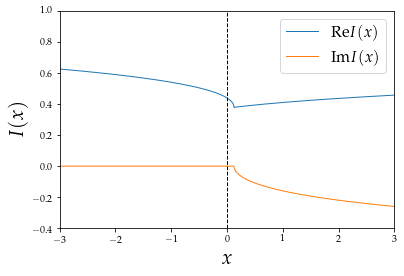

In [8]:
foo.bubbleScale()

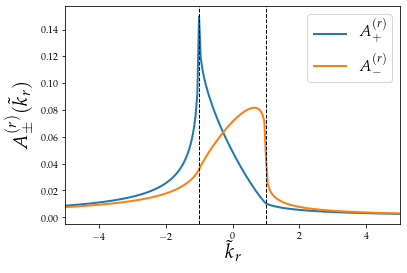

In [13]:
foo.radialScale()

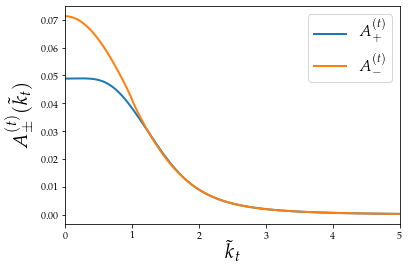

In [9]:
foo.tangentialScale()

In [10]:
foo.printCoefficients()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

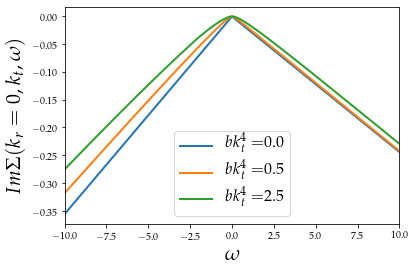

In [11]:
foo.tangentialSelfEnergy()

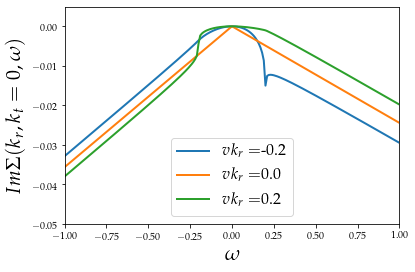

In [12]:
foo.radialSelfEnergy()

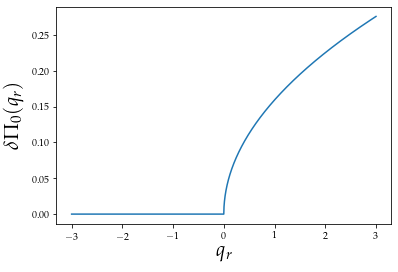

In [4]:
# bare bubble for parabolic dispersion
def f(x):
    if(x<0):
        return 0.0
    else:
        return 1.0/(2.0*math.pi)*math.sqrt(x)
f2 = np.vectorize(f)
x = np.linspace(-3, 3, 5000)
plt.plot(x, f2(x))
plt.xlabel(r'$q_r$',fontsize=20)
plt.ylabel(r'$\delta\Pi_0(q_r)$',fontsize=20)
#plt.savefig('Graphics/flatBubble.pdf',bbox_inches="tight")
plt.show()

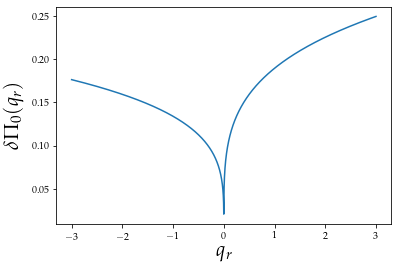

In [6]:
# bare bubble for quartic dispersion
def f(qr,alf):
    if(qr<0):
        return abs(qr)**(1.0/alf)/(2*math.pi*(2)**(1.0/alf))*1/math.tan(math.pi/alf)
    else:
        return abs(qr)**(1.0/alf)/(2*math.pi*(2)**(1.0/alf))*1/math.sin(math.pi/alf)
f2 = np.vectorize(f)
x = np.linspace(-3, 3, 5000)
plt.plot(x, f2(x,4))
plt.xlabel(r'$q_r$',fontsize=20)
plt.ylabel(r'$\delta\Pi_0(q_r)$',fontsize=20)
#plt.savefig('Graphics/flatBubble.pdf',bbox_inches="tight")
plt.show()

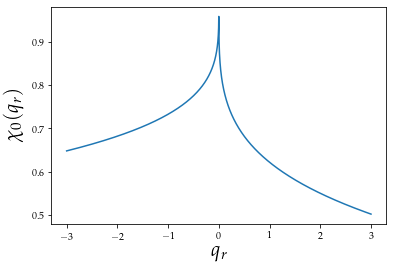

In [15]:
# bare susceptibility for quartic dispersion
def f(qr,alf):
    if(qr<0):
        return -2*abs(qr)**(1.0/alf)/(2*math.pi*(2)**(1.0/alf))*1/math.tan(math.pi/alf) +1.0
    else:
        return -2*abs(qr)**(1.0/alf)/(2*math.pi*(2)**(1.0/alf))*1/math.sin(math.pi/alf)+1.0
f2 = np.vectorize(f)
x = np.linspace(-3, 3, 5000)
plt.plot(x, f2(x,4))
plt.xlabel(r'$q_r$',fontsize=20)
plt.ylabel(r'$\chi_0(q_r)$',fontsize=20)
#plt.savefig('Graphics/flatBubble.pdf',bbox_inches="tight")
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


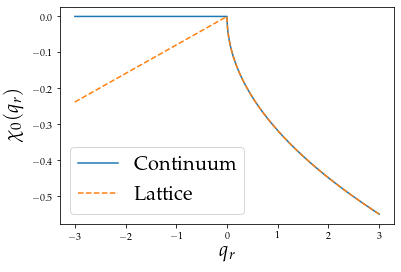

In [16]:
# bare susceptibility for parabolic dispersion: lattice and continuum
def f(x):
    if(x<0):
        return 0.0
    else:
        return -2/(2*math.pi)*math.sqrt(x)
f2 = np.vectorize(f)
x = np.linspace(-3, 3, 5000)
plt.plot(x, f2(x),label='Continuum')

def g(x):
    if(x<0):
        return 1/(4*math.pi)*x
    else:
        return -2/(2*math.pi)*math.sqrt(x)
g2 = np.vectorize(g)
x = np.linspace(-3, 3, 5000)
plt.plot(x, g2(x),label='Lattice',linestyle='dashed')


plt.xlabel(r'$q_r$',fontsize=20)
plt.ylabel(r'$\chi_0(q_r)$',fontsize=20)
plt.legend(fontsize=20)
#plt.savefig('bareSuscep.pdf',bbox_inches="tight")
plt.show()